In [1]:
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')


# 1. problem statement

# 2.Data Gathering

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

# 3. Exploratory Data Analysis(EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

## area_type

In [6]:
df['area_type']

0        Super built-up  Area
1                  Plot  Area
2              Built-up  Area
3        Super built-up  Area
4        Super built-up  Area
                 ...         
13315          Built-up  Area
13316    Super built-up  Area
13317          Built-up  Area
13318    Super built-up  Area
13319    Super built-up  Area
Name: area_type, Length: 13320, dtype: object

In [7]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [8]:
df = pd.get_dummies(df,columns = ['area_type'])
df

,availability,location,size,society,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,0,0,0,1
1,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,0,0,1,0
2,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,1,0,0,0
3,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,0,0,0,1
4,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13315,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,1,0,0,0
13316,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00,0,0,0,1
13317,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00,1,0,0,0
13318,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00,0,0,0,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   availability                    13320 non-null  object 
 1   location                        13319 non-null  object 
 2   size                            13304 non-null  object 
 3   society                         7818 non-null   object 
 4   total_sqft                      13320 non-null  object 
 5   bath                            13247 non-null  float64
 6   balcony                         12711 non-null  float64
 7   price                           13320 non-null  float64
 8   area_type_Built-up  Area        13320 non-null  uint8  
 9   area_type_Carpet  Area          13320 non-null  uint8  
 10  area_type_Plot  Area            13320 non-null  uint8  
 11  area_type_Super built-up  Area  13320 non-null  uint8  
dtypes: float64(3), object(5), uint8(

## availability

In [10]:
df['availability']

0               19-Dec
1        Ready To Move
2        Ready To Move
3        Ready To Move
4        Ready To Move
             ...      
13315    Ready To Move
13316    Ready To Move
13317    Ready To Move
13318           18-Jun
13319    Ready To Move
Name: availability, Length: 13320, dtype: object

In [11]:
df['availability'].value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64

In [12]:
df = df.drop('availability',axis = 1)
df

,location,size,society,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,0,0,0,1
1,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,0,0,1,0
2,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,1,0,0,0
3,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,0,0,0,1
4,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,1,0,0,0
13316,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00,0,0,0,1
13317,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00,1,0,0,0
13318,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00,0,0,0,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   location                        13319 non-null  object 
 1   size                            13304 non-null  object 
 2   society                         7818 non-null   object 
 3   total_sqft                      13320 non-null  object 
 4   bath                            13247 non-null  float64
 5   balcony                         12711 non-null  float64
 6   price                           13320 non-null  float64
 7   area_type_Built-up  Area        13320 non-null  uint8  
 8   area_type_Carpet  Area          13320 non-null  uint8  
 9   area_type_Plot  Area            13320 non-null  uint8  
 10  area_type_Super built-up  Area  13320 non-null  uint8  
dtypes: float64(3), object(4), uint8(4)
memory usage: 780.6+ KB


## location

In [14]:
df['location']

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13320, dtype: object

In [15]:
df['location'].isna().sum()

1

In [16]:
df['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [17]:
df['location'].fillna(df['location'].mode()[0],inplace = True)

In [18]:
df['location'].isna().sum()

0

In [19]:
df =df.drop('location',axis = 1)
df

,size,society,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,2 BHK,Coomee,1056,2.0,1.0,39.07,0,0,0,1
1,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,0,0,1,0
2,3 BHK,NaN,1440,2.0,3.0,62.00,1,0,0,0
3,3 BHK,Soiewre,1521,3.0,1.0,95.00,0,0,0,1
4,2 BHK,NaN,1200,2.0,1.0,51.00,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
13315,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,1,0,0,0
13316,4 BHK,NaN,3600,5.0,NaN,400.00,0,0,0,1
13317,2 BHK,Mahla T,1141,2.0,1.0,60.00,1,0,0,0
13318,4 BHK,SollyCl,4689,4.0,1.0,488.00,0,0,0,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   size                            13304 non-null  object 
 1   society                         7818 non-null   object 
 2   total_sqft                      13320 non-null  object 
 3   bath                            13247 non-null  float64
 4   balcony                         12711 non-null  float64
 5   price                           13320 non-null  float64
 6   area_type_Built-up  Area        13320 non-null  uint8  
 7   area_type_Carpet  Area          13320 non-null  uint8  
 8   area_type_Plot  Area            13320 non-null  uint8  
 9   area_type_Super built-up  Area  13320 non-null  uint8  
dtypes: float64(3), object(3), uint8(4)
memory usage: 676.5+ KB


In [21]:
df

,size,society,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,2 BHK,Coomee,1056,2.0,1.0,39.07,0,0,0,1
1,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,0,0,1,0
2,3 BHK,NaN,1440,2.0,3.0,62.00,1,0,0,0
3,3 BHK,Soiewre,1521,3.0,1.0,95.00,0,0,0,1
4,2 BHK,NaN,1200,2.0,1.0,51.00,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
13315,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,1,0,0,0
13316,4 BHK,NaN,3600,5.0,NaN,400.00,0,0,0,1
13317,2 BHK,Mahla T,1141,2.0,1.0,60.00,1,0,0,0
13318,4 BHK,SollyCl,4689,4.0,1.0,488.00,0,0,0,1


## size

In [22]:
df['size']

0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13315    5 Bedroom
13316        4 BHK
13317        2 BHK
13318        4 BHK
13319        1 BHK
Name: size, Length: 13320, dtype: object

In [23]:
df['size'].isna().sum()

16

In [24]:
df['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [25]:
df['size'].fillna(df['size'].mode()[0],inplace = True)

In [26]:
df['size'].isna().sum()

0

In [27]:
laber_encoder = preprocessing.LabelEncoder()
df['size'] = laber_encoder.fit_transform(df['size'])

In [28]:
df['size'].value_counts()

13    5215
16    4310
19     826
18     591
17     547
0      538
14     329
22     297
24     191
1      105
28      84
26      83
21      59
30      46
23      30
25      17
2       13
4       12
29       8
27       5
5        2
6        2
3        2
9        1
8        1
7        1
15       1
20       1
10       1
12       1
11       1
Name: size, dtype: int64

In [29]:
size_dict = {'2 BHK': 13,
 '3 BHK': 16,
 '4 Bedroom': 19,
 '4 BHK': 18,
 '3 Bedroom': 17,
 '1 BHK': 0,
 '2 Bedroom': 14,
 '5 Bedroom': 22,
 '6 Bedroom': 24,
 '1 Bedroom': 1,
 '8 Bedroom': 28,
 '7 Bedroom': 26,
 '5 BHK': 21,
 '9 Bedroom': 30,
 '6 BHK': 23,
 '7 BHK': 24,
 '1 RK': 2,
 '10 Bedroom': 4,
 '9 BHK': 29,
 '8 BHK': 27,
 '11 BHK': 5,
 '11 Bedroom': 6,
 '10 BHK': 3,
 '14 BHK': 9,
 '13 BHK': 8,
 '12 Bedroom': 7,
 '27 BHK': 15,
 '43 Bedroom': 20,
 '16 BHK': 10,
 '19 BHK': 12,
 '18 Bedroom': 11}
size_dict

{'2 BHK': 13,
 '3 BHK': 16,
 '4 Bedroom': 19,
 '4 BHK': 18,
 '3 Bedroom': 17,
 '1 BHK': 0,
 '2 Bedroom': 14,
 '5 Bedroom': 22,
 '6 Bedroom': 24,
 '1 Bedroom': 1,
 '8 Bedroom': 28,
 '7 Bedroom': 26,
 '5 BHK': 21,
 '9 Bedroom': 30,
 '6 BHK': 23,
 '7 BHK': 24,
 '1 RK': 2,
 '10 Bedroom': 4,
 '9 BHK': 29,
 '8 BHK': 27,
 '11 BHK': 5,
 '11 Bedroom': 6,
 '10 BHK': 3,
 '14 BHK': 9,
 '13 BHK': 8,
 '12 Bedroom': 7,
 '27 BHK': 15,
 '43 Bedroom': 20,
 '16 BHK': 10,
 '19 BHK': 12,
 '18 Bedroom': 11}

## society

In [30]:
df['society']

0        Coomee 
1        Theanmp
2            NaN
3        Soiewre
4            NaN
          ...   
13315    ArsiaEx
13316        NaN
13317    Mahla T
13318    SollyCl
13319        NaN
Name: society, Length: 13320, dtype: object

In [31]:
df['society'].isnull().sum()

5502

In [32]:
df = df.drop('society',axis = 1)
df

,size,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,13,1056,2.0,1.0,39.07,0,0,0,1
1,19,2600,5.0,3.0,120.00,0,0,1,0
2,16,1440,2.0,3.0,62.00,1,0,0,0
3,16,1521,3.0,1.0,95.00,0,0,0,1
4,13,1200,2.0,1.0,51.00,0,0,0,1
...,...,...,...,...,...,...,...,...,...
13315,22,3453,4.0,0.0,231.00,1,0,0,0
13316,18,3600,5.0,NaN,400.00,0,0,0,1
13317,13,1141,2.0,1.0,60.00,1,0,0,0
13318,18,4689,4.0,1.0,488.00,0,0,0,1


## total_sqft

In [33]:
df['total_sqft']

0        1056
1        2600
2        1440
3        1521
4        1200
         ... 
13315    3453
13316    3600
13317    1141
13318    4689
13319     550
Name: total_sqft, Length: 13320, dtype: object

In [34]:
df['total_sqft'].isnull().sum()

0

In [35]:
new_total_sqft=[]
for str_value in df["total_sqft"]:
    try:
        total_squre_fit.append(float(str_value))
    except:
        try:
            temp=[]
            temp=str_value.split("-")
            new_total_sqft.append((float(temp[0])+float(temp[-1]))/2)
        except:
            new_total_sqft.append(np.nan)

In [36]:
df['new_total_sqft'] = new_total_sqft

In [37]:
df['new_total_sqft'].isna().sum()

46

In [38]:
df['new_total_sqft'].fillna(df['new_total_sqft'].median(),inplace = True)

In [39]:
df['new_total_sqft'].isna().sum()

0

In [40]:
df = df.drop('total_sqft',axis = 1)
df

,size,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,new_total_sqft
0,13,2.0,1.0,39.07,0,0,0,1,1056.0
1,19,5.0,3.0,120.00,0,0,1,0,2600.0
2,16,2.0,3.0,62.00,1,0,0,0,1440.0
3,16,3.0,1.0,95.00,0,0,0,1,1521.0
4,13,2.0,1.0,51.00,0,0,0,1,1200.0
...,...,...,...,...,...,...,...,...,...
13315,22,4.0,0.0,231.00,1,0,0,0,3453.0
13316,18,5.0,NaN,400.00,0,0,0,1,3600.0
13317,13,2.0,1.0,60.00,1,0,0,0,1141.0
13318,18,4.0,1.0,488.00,0,0,0,1,4689.0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   size                            13320 non-null  int32  
 1   bath                            13247 non-null  float64
 2   balcony                         12711 non-null  float64
 3   price                           13320 non-null  float64
 4   area_type_Built-up  Area        13320 non-null  uint8  
 5   area_type_Carpet  Area          13320 non-null  uint8  
 6   area_type_Plot  Area            13320 non-null  uint8  
 7   area_type_Super built-up  Area  13320 non-null  uint8  
 8   new_total_sqft                  13320 non-null  float64
dtypes: float64(4), int32(1), uint8(4)
memory usage: 520.4 KB


## bath 

In [42]:
df['bath']

0        2.0
1        5.0
2        2.0
3        3.0
4        2.0
        ... 
13315    4.0
13316    5.0
13317    2.0
13318    4.0
13319    1.0
Name: bath, Length: 13320, dtype: float64

In [43]:
df['bath'].isna().sum()

73

In [44]:
df['bath'].value_counts()

2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: bath, dtype: int64

In [45]:
df['bath'].fillna(df['bath'].mode()[0],inplace = True)

In [46]:
df['bath'].isna().sum()

0

## balcony

In [47]:
df['balcony']

0        1.0
1        3.0
2        3.0
3        1.0
4        1.0
        ... 
13315    0.0
13316    NaN
13317    1.0
13318    1.0
13319    1.0
Name: balcony, Length: 13320, dtype: float64

In [48]:
df['balcony'].isna().sum()

609

In [49]:
df['balcony'].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [50]:
df['balcony'].fillna(df['balcony'].mode()[0],inplace = True)

In [51]:
df['balcony'].isna().sum()

0

In [52]:
df

,size,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,new_total_sqft
0,13,2.0,1.0,39.07,0,0,0,1,1056.0
1,19,5.0,3.0,120.00,0,0,1,0,2600.0
2,16,2.0,3.0,62.00,1,0,0,0,1440.0
3,16,3.0,1.0,95.00,0,0,0,1,1521.0
4,13,2.0,1.0,51.00,0,0,0,1,1200.0
...,...,...,...,...,...,...,...,...,...
13315,22,4.0,0.0,231.00,1,0,0,0,3453.0
13316,18,5.0,2.0,400.00,0,0,0,1,3600.0
13317,13,2.0,1.0,60.00,1,0,0,0,1141.0
13318,18,4.0,1.0,488.00,0,0,0,1,4689.0


# Feature Engineering

In [53]:
df.columns

Index(['size', 'bath', 'balcony', 'price', 'area_type_Built-up  Area',
       'area_type_Carpet  Area', 'area_type_Plot  Area',
       'area_type_Super built-up  Area', 'new_total_sqft'],
      dtype='object')

<AxesSubplot:>

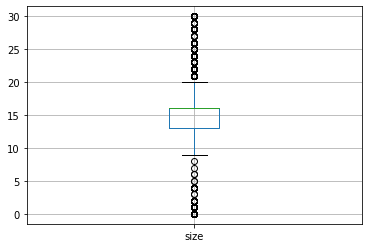

In [54]:
df[['size']].boxplot()

q1--> 13.0
q2--> 16.0
q3--> 16.0
upper_tail--> 20.5
lower_tail--> 8.5
mean--> 14.79129129129129
16.0


<AxesSubplot:>

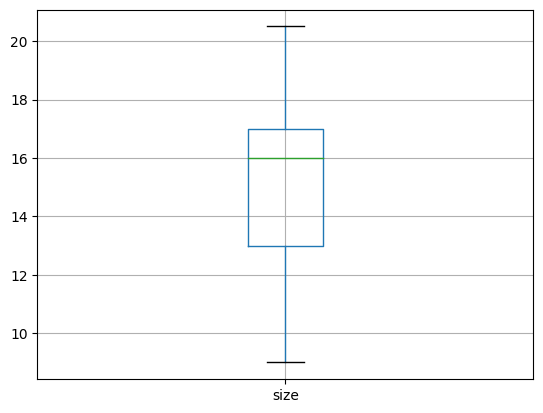

In [55]:
q1=df['size'].quantile(0.25)
q2=df['size'].quantile(0.50)
q3=df['size'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

print("mean-->",(df['size'].mean()))

df['size'].median()

size_df=df[['size']].loc[(df['size'] < upper_tail) & 
                                   (df['size'] > lower_tail)].median()[0]
print(size_df)  

df.loc[(df['size'] > upper_tail) |
                (df['size'] < lower_tail), 'size'] = upper_tail


df[['size']].boxplot()

<AxesSubplot:>

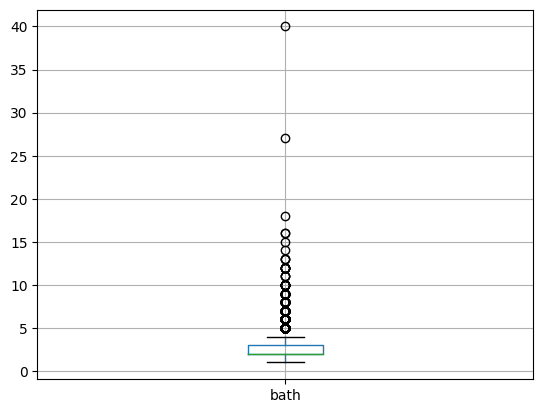

In [56]:
df[['bath']].boxplot()

q1--> 2.0
q2--> 2.0
q3--> 3.0
upper_tail--> 4.5
lower_tail--> 0.5
mean--> 2.688813813813814
2.0


<AxesSubplot:>

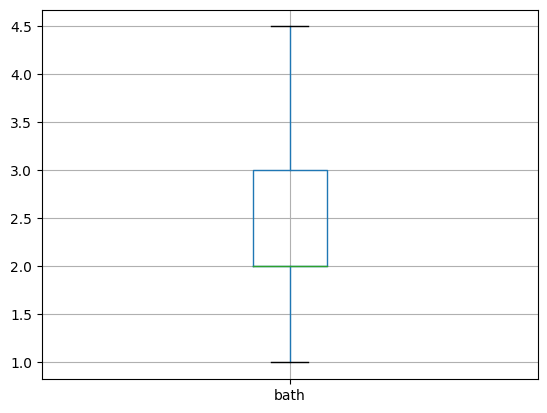

In [57]:
q1=df['bath'].quantile(0.25)
q2=df['bath'].quantile(0.50)
q3=df['bath'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

print("mean-->",(df['bath'].mean()))

df['bath'].median()

size_df=df[['bath']].loc[(df['bath'] < upper_tail) & 
                                   (df['bath'] > lower_tail)].median()[0]
print(size_df)  

df.loc[(df['bath'] > upper_tail) |
                (df['bath'] < lower_tail), 'bath'] = upper_tail


df[['bath']].boxplot()

<AxesSubplot:>

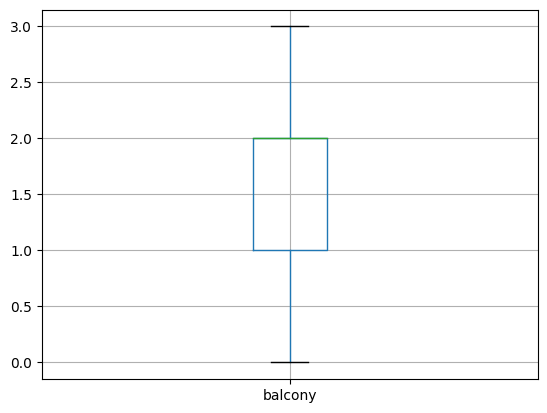

In [58]:
df[['balcony']].boxplot()

<AxesSubplot:>

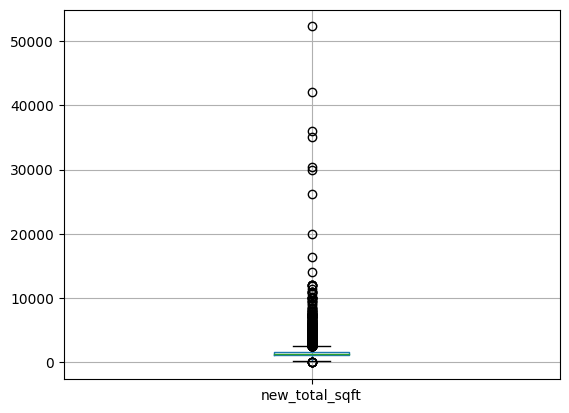

In [59]:
df[['new_total_sqft']].boxplot()

q1--> 1100.0
q2--> 1276.0
q3--> 1678.0
upper_tail--> 2545.0
lower_tail--> 233.0
mean--> 1558.6472023273272
1240.0


<AxesSubplot:>

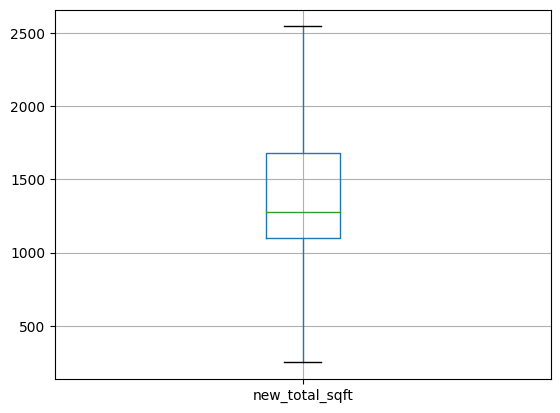

In [60]:
q1=df['new_total_sqft'].quantile(0.25)
q2=df['new_total_sqft'].quantile(0.50)
q3=df['new_total_sqft'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

print("mean-->",(df['new_total_sqft'].mean()))

df['new_total_sqft'].median()

size_df=df[['new_total_sqft']].loc[(df['new_total_sqft'] < upper_tail) & 
                                   (df['new_total_sqft'] > lower_tail)].median()[0]
print(size_df)  

df.loc[(df['new_total_sqft'] > upper_tail) |
                (df['new_total_sqft'] < lower_tail), 'new_total_sqft'] = upper_tail


df[['new_total_sqft']].boxplot()

# freature selection

In [61]:
df.corr()

,size,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,new_total_sqft
size,1.000000,0.531513,0.035896,0.356973,0.024002,0.011555,0.445840,-0.359396,0.333966
bath,0.531513,1.000000,0.269880,0.486020,-0.015213,-0.010976,0.383643,-0.276519,0.650038
balcony,0.035896,0.269880,1.000000,0.124951,-0.062810,-0.016821,-0.081458,0.115703,0.271225
price,0.356973,0.486020,0.124951,1.000000,-0.026177,-0.012553,0.272669,-0.183222,0.552737
area_type_Built-up Area,0.024002,-0.015213,-0.062810,-0.026177,1.000000,-0.038186,-0.199409,-0.656025,0.033613
area_type_Carpet Area,0.011555,-0.010976,-0.016821,-0.012553,-0.038186,1.000000,-0.034332,-0.112947,-0.025494
area_type_Plot Area,0.445840,0.383643,-0.081458,0.272669,-0.199409,-0.034332,1.000000,-0.589814,0.059263
area_type_Super built-up Area,-0.359396,-0.276519,0.115703,-0.183222,-0.656025,-0.112947,-0.589814,1.000000,-0.067929
new_total_sqft,0.333966,0.650038,0.271225,0.552737,0.033613,-0.025494,0.059263,-0.067929,1.000000


<AxesSubplot:>

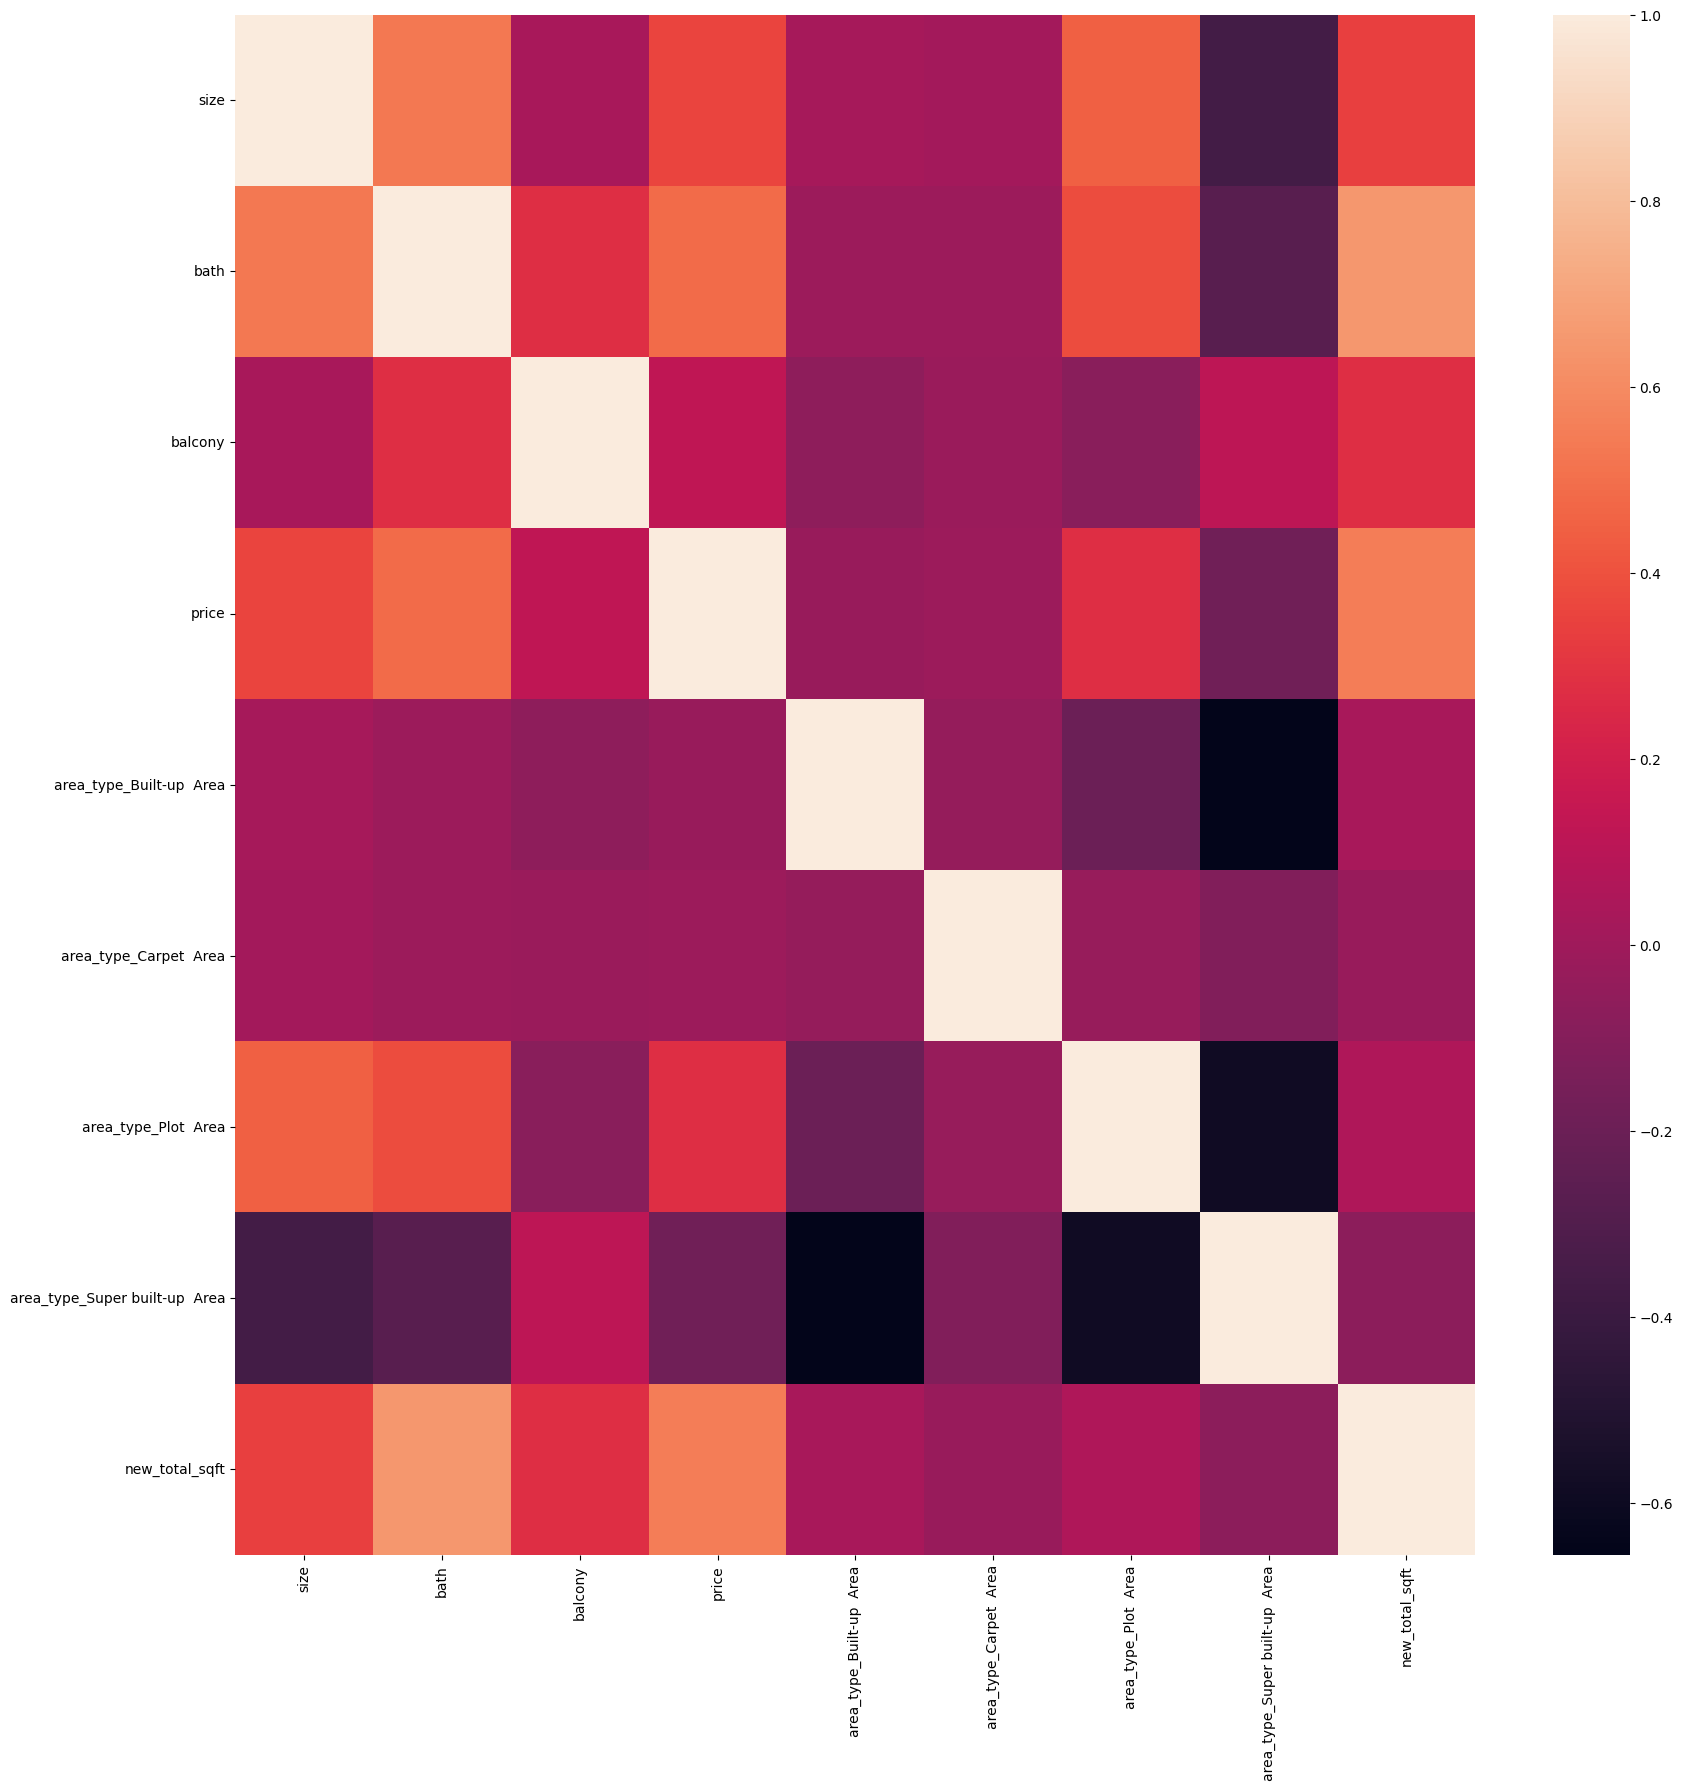

In [62]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

# model Training

In [63]:
x = df.drop('price',axis = 1)
y = df['price']

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=6)
x_train

,size,bath,balcony,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,new_total_sqft
4675,16.0,3.0,2.0,0,0,0,1,1595.0
7256,20.5,4.5,2.0,0,0,0,1,2400.0
7241,16.0,2.0,2.0,0,0,0,1,1310.0
1789,19.0,4.0,2.0,0,0,1,0,2545.0
290,13.0,2.0,1.0,0,0,0,1,1017.0
...,...,...,...,...,...,...,...,...
8527,20.5,1.0,1.0,0,1,0,0,460.0
4714,20.5,4.0,3.0,0,0,1,0,1200.0
10196,13.0,1.0,1.0,0,0,0,1,795.0
8419,13.0,2.0,1.0,0,0,0,1,1204.0


In [65]:
bengaluru_model = LinearRegression()
bengaluru_model.fit(x_train,y_train)

LinearRegression()

# metric evalution

## testing data

In [66]:
y_pred_test = bengaluru_model.predict(x_test)

mse = mean_squared_error(y_test,y_pred_test)
print("mse-->",mse)

rmse = np.sqrt(mse)
print("rmse-->",rmse)

mae = mean_absolute_error(y_test,y_pred_test)
print("mae-->",mae)

r2 = r2_score(y_test,y_pred_test)
print('r2_score-->',r2)


mse--> 14710.145679014551
rmse--> 121.285389388065
mae--> 50.04529155656786
r2_score--> 0.36401327179716825


## Training data

In [67]:
y_pred_train = bengaluru_model.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print("mse-->",mse)

rmse = np.sqrt(mse)
print("rmse-->",rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print("mae-->",mae)

r2 = r2_score(y_train,y_pred_train)
print('r2_score-->',r2)

mse--> 13740.734886643748
rmse--> 117.22088076210547
mae--> 49.73651137311894
r2_score--> 0.3741415053526268


# Training on single row

In [68]:
column_names = x.columns
column_names

Index(['size', 'bath', 'balcony', 'area_type_Built-up  Area',
       'area_type_Carpet  Area', 'area_type_Plot  Area',
       'area_type_Super built-up  Area', 'new_total_sqft'],
      dtype='object')

In [69]:
x.head(1).T

,0
size,13.0
bath,2.0
balcony,1.0
area_type_Built-up Area,0.0
area_type_Carpet Area,0.0
area_type_Plot Area,0.0
area_type_Super built-up Area,1.0
new_total_sqft,1056.0


In [70]:
size_dict = {'2 BHK': 13,
 '3 BHK': 16,
 '4 Bedroom': 19,
 '4 BHK': 18,
 '3 Bedroom': 17,
 '1 BHK': 0,
 '2 Bedroom': 14,
 '5 Bedroom': 22,
 '6 Bedroom': 24,
 '1 Bedroom': 1,
 '8 Bedroom': 28,
 '7 Bedroom': 26,
 '5 BHK': 21,
 '9 Bedroom': 30,
 '6 BHK': 23,
 '7 BHK': 24,
 '1 RK': 2,
 '10 Bedroom': 4,
 '9 BHK': 29,
 '8 BHK': 27,
 '11 BHK': 5,
 '11 Bedroom': 6,
 '10 BHK': 3,
 '14 BHK': 9,
 '13 BHK': 8,
 '12 Bedroom': 7,
 '27 BHK': 15,
 '43 Bedroom': 20,
 '16 BHK': 10,
 '19 BHK': 12,
 '18 Bedroom': 11}
size_dict

{'2 BHK': 13,
 '3 BHK': 16,
 '4 Bedroom': 19,
 '4 BHK': 18,
 '3 Bedroom': 17,
 '1 BHK': 0,
 '2 Bedroom': 14,
 '5 Bedroom': 22,
 '6 Bedroom': 24,
 '1 Bedroom': 1,
 '8 Bedroom': 28,
 '7 Bedroom': 26,
 '5 BHK': 21,
 '9 Bedroom': 30,
 '6 BHK': 23,
 '7 BHK': 24,
 '1 RK': 2,
 '10 Bedroom': 4,
 '9 BHK': 29,
 '8 BHK': 27,
 '11 BHK': 5,
 '11 Bedroom': 6,
 '10 BHK': 3,
 '14 BHK': 9,
 '13 BHK': 8,
 '12 Bedroom': 7,
 '27 BHK': 15,
 '43 Bedroom': 20,
 '16 BHK': 10,
 '19 BHK': 12,
 '18 Bedroom': 11}

In [71]:
# user input
size='19 BHK'
bath=40.0
balcony=80.0
area_type ='Built-up  Area'
new_total_sqft=12000.0

area_type_col = "area_type_" + area_type
print("area_type_col-->",area_type_col)

area_type_col--> area_type_Built-up  Area


In [72]:
column_names

Index(['size', 'bath', 'balcony', 'area_type_Built-up  Area',
       'area_type_Carpet  Area', 'area_type_Plot  Area',
       'area_type_Super built-up  Area', 'new_total_sqft'],
      dtype='object')

In [73]:
area_type_index = np.where(column_names == area_type_col)[0][0]
print('area_type_index-->',area_type_index)

area_type_index--> 3


In [74]:
array = np.zeros(column_names.shape[0],dtype=int)
array[0] = size_dict[size]
array[1] = bath
array[2] = balcony
array[3] = new_total_sqft
array[area_type_index] = 1


In [75]:
predicted_bangaluru_house = bengaluru_model.predict([array])[0]
print(f"Predicted bangaluru house price is {np.around(predicted_bangaluru_house)} lac")

Predicted bangaluru house price is 68.0 lac


In [76]:
json_home_data = {"size_dict":size_dict,"columns":list(column_names)}
json_home_data

{'size_dict': {'2 BHK': 13,
  '3 BHK': 16,
  '4 Bedroom': 19,
  '4 BHK': 18,
  '3 Bedroom': 17,
  '1 BHK': 0,
  '2 Bedroom': 14,
  '5 Bedroom': 22,
  '6 Bedroom': 24,
  '1 Bedroom': 1,
  '8 Bedroom': 28,
  '7 Bedroom': 26,
  '5 BHK': 21,
  '9 Bedroom': 30,
  '6 BHK': 23,
  '7 BHK': 24,
  '1 RK': 2,
  '10 Bedroom': 4,
  '9 BHK': 29,
  '8 BHK': 27,
  '11 BHK': 5,
  '11 Bedroom': 6,
  '10 BHK': 3,
  '14 BHK': 9,
  '13 BHK': 8,
  '12 Bedroom': 7,
  '27 BHK': 15,
  '43 Bedroom': 20,
  '16 BHK': 10,
  '19 BHK': 12,
  '18 Bedroom': 11},
 'columns': ['size',
  'bath',
  'balcony',
  'area_type_Built-up  Area',
  'area_type_Carpet  Area',
  'area_type_Plot  Area',
  'area_type_Super built-up  Area',
  'new_total_sqft']}

In [77]:
json_home_data ={'size_dict': {'2 BHK': 13,
  '3 BHK': 16,
  '4 Bedroom': 19,
  '4 BHK': 18,
  '3 Bedroom': 17,
  '1 BHK': 0,
  '2 Bedroom': 14,
  '5 Bedroom': 22,
  '6 Bedroom': 24,
  '1 Bedroom': 1,
  '8 Bedroom': 28,
  '7 Bedroom': 26,
  '5 BHK': 21,
  '9 Bedroom': 30,
  '6 BHK': 23,
  '7 BHK': 24,
  '1 RK': 2,
  '10 Bedroom': 4,
  '9 BHK': 29,
  '8 BHK': 27,
  '11 BHK': 5,
  '11 Bedroom': 6,
  '10 BHK': 3,
  '14 BHK': 9,
                                
  '13 BHK': 8,
  '12 Bedroom': 7,
  '27 BHK': 15,
  '43 Bedroom': 20,
  '16 BHK': 10,
  '19 BHK': 12,
  '18 Bedroom': 11},
 'columns': ['size',
  'bath',
  'balcony',
  'area_type_Built-up  Area',
  'area_type_Carpet  Area',
  'area_type_Plot  Area',
  'area_type_Super built-up  Area',
  'new_total_sqft']}
json_home_data

{'size_dict': {'2 BHK': 13,
  '3 BHK': 16,
  '4 Bedroom': 19,
  '4 BHK': 18,
  '3 Bedroom': 17,
  '1 BHK': 0,
  '2 Bedroom': 14,
  '5 Bedroom': 22,
  '6 Bedroom': 24,
  '1 Bedroom': 1,
  '8 Bedroom': 28,
  '7 Bedroom': 26,
  '5 BHK': 21,
  '9 Bedroom': 30,
  '6 BHK': 23,
  '7 BHK': 24,
  '1 RK': 2,
  '10 Bedroom': 4,
  '9 BHK': 29,
  '8 BHK': 27,
  '11 BHK': 5,
  '11 Bedroom': 6,
  '10 BHK': 3,
  '14 BHK': 9,
  '13 BHK': 8,
  '12 Bedroom': 7,
  '27 BHK': 15,
  '43 Bedroom': 20,
  '16 BHK': 10,
  '19 BHK': 12,
  '18 Bedroom': 11},
 'columns': ['size',
  'bath',
  'balcony',
  'area_type_Built-up  Area',
  'area_type_Carpet  Area',
  'area_type_Plot  Area',
  'area_type_Super built-up  Area',
  'new_total_sqft']}

In [78]:
# json file
import json

with open("json_bengaluru_data.json","w") as f:
    json.dump(json_home_data,f)

In [79]:
# pickle file
import pickle

with open("bengaluru_model.pkl","wb") as f:
    pickle.dump(bengaluru_model,f)